In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string 
from utils import get_RSA3 
%matplotlib inline

In [3]:
import os
curr_dr = os.getcwd() 

## Biased embeddings RSA scores

#### Word2Vec

In [4]:
w2v_biased =  get_RSA3(curr_dr+'/data/Word_Data_race.xlsx', 
        curr_dr  + "/data/data_vocab_race_pre_trained.w2v", 50)

White_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles White_Concept: 0.19393236978037595 STD: 0.10278797690217091
RSA Asian_Roles White_Concept: -0.05133887963537337 STD: 0.056437439117677145
RSA Black_Roles White_Concept: -0.02713773780456214 STD: 0.07688259216364467
Sign Test White_Roles vs. Asian_Roles: 1.5777218104420236e-30
Sign Test White_Roles vs. Black_Roles: 2.7261437328060387e-20
Sign Test Black_Roles vs. Asian_Roles: 0.020978735677851718

Asian_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles Asian_Concept: 0.16575802167492817 STD: 0.06278434439930161
RSA Asian_Roles Asian_Concept: 0.021196136336100877 STD: 0.04596240122742042
RSA Black_Roles Asian_Concept: -0.04098337338282483 STD: 0.06927611084311293
Sign Test White_Roles vs. Asian_Roles: 2.630866896130179e-25
Sign Test White_Roles vs. Black_Roles: 2.630866896130179e-25
Sign Test Black_Roles vs. Asian_Roles: 0.0008737198369123726

Black_Conc

## Hard Debiased embeddings RSA scores

#### Word2Vec

In [5]:
w2v_hd_final = get_RSA3( curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/harddebiased.w2v", 50)

White_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles White_Concept: 0.1876907665240984 STD: 0.0752227474804832
RSA Asian_Roles White_Concept: -0.04022314555823997 STD: 0.04947843730735742
RSA Black_Roles White_Concept: -0.09918405292114946 STD: 0.07430733128806782
Sign Test White_Roles vs. Asian_Roles: 1.5777218104420236e-30
Sign Test White_Roles vs. Black_Roles: 1.5777218104420236e-30
Sign Test Black_Roles vs. Asian_Roles: 1.2579150016678854e-05

Asian_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles Asian_Concept: 0.13129915665845884 STD: 0.051496656824830025
RSA Asian_Roles Asian_Concept: -0.05046946941663473 STD: 0.041293746335263365
RSA Black_Roles Asian_Concept: -0.09801387329666449 STD: 0.06179972685025737
Sign Test White_Roles vs. Asian_Roles: 1.5777218104420236e-30
Sign Test White_Roles vs. Black_Roles: 1.5777218104420236e-30
Sign Test Black_Roles vs. Asian_Roles: 5.636282034205398e-07

Black_C

### Double Hard Debiased embeddings RSA scores

#### Word2Vec

In [6]:
w2v_dhd_final = get_RSA3(curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/doubleharddebiased.w2v", 50)

White_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles White_Concept: 0.17055830948849784 STD: 0.062960204347562
RSA Asian_Roles White_Concept: -0.05400575962705032 STD: 0.0566093445296218
RSA Black_Roles White_Concept: -0.1272264304375473 STD: 0.05662147267962422
Sign Test White_Roles vs. Asian_Roles: 1.5777218104420236e-30
Sign Test White_Roles vs. Black_Roles: 1.5777218104420236e-30
Sign Test Black_Roles vs. Asian_Roles: 1.911357536027706e-15

Asian_Concept
word idx matrices created
glove matrices created
embeds generated
RSA White_Roles Asian_Concept: 0.1237978388315753 STD: 0.0498067345239005
RSA Asian_Roles Asian_Concept: -0.0646764637935579 STD: 0.051051840088967244
RSA Black_Roles Asian_Concept: -0.14950394346156326 STD: 0.06151165128671529
Sign Test White_Roles vs. Asian_Roles: 1.5777218104420236e-30
Sign Test White_Roles vs. Black_Roles: 1.5777218104420236e-30
Sign Test Black_Roles vs. Asian_Roles: 2.0059595219236137e-21

Black_Concept

## Visualizations

#### Get the RSA means of each embedding results 

In [47]:
results = []
for key in w2v_biased: 
    vals = list(w2v_biased[key])
    vals.append(vals[1][0]+"R_"+vals[2][0]+"C")
    vals.append("Biased")
    results.append(vals)
for key in w2v_biased: 
    vals = list(w2v_hd_final[key])
    vals.append(vals[1][0]+"R_"+vals[2][0]+"C")
    vals.append("Hard Debiased")
    results.append(vals)
for key in w2v_biased: 
    vals = list(w2v_dhd_final[key])
    vals.append(vals[1][0]+"R_"+vals[2][0]+"C")
    vals.append("Double Hard Debiased")
    results.append(vals)

In [50]:
import pandas as pd
df = pd.DataFrame(results,
                       columns=['RSA', 'Roles', 'Concept', 'Roles and Concept', 'Bias' ])

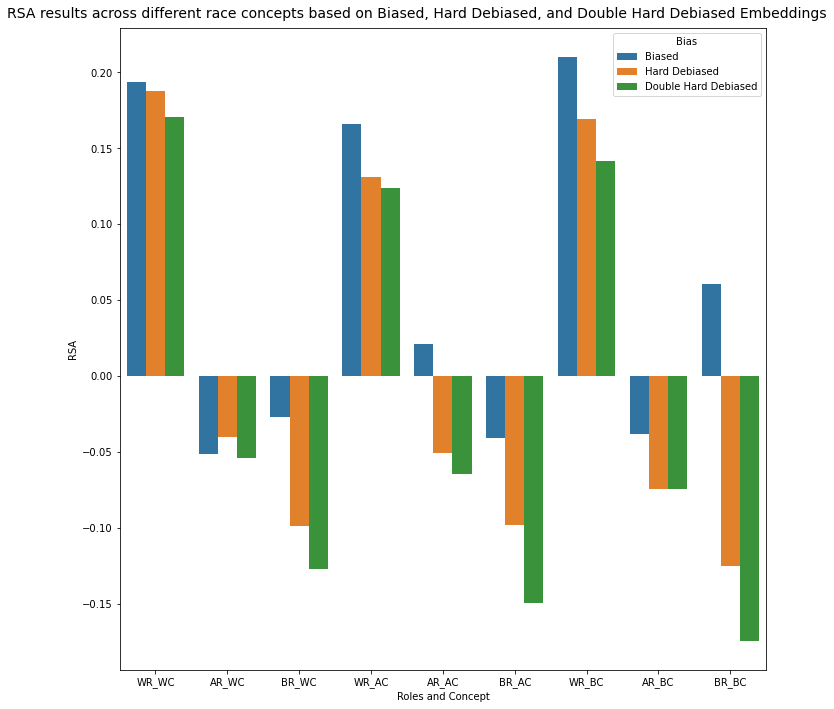

In [57]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle(
    "RSA results across different race concepts based on Biased, Hard Debiased, and Double Hard Debiased Embeddings",
    fontsize=14,
)
ax = sns.barplot(x="Roles and Concept", y="RSA", hue="Bias", data=df)
plt.tight_layout()
plt.show()